$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
<body>
    <div>
        <tr><h1>
        <b><font face="Verdana">Distinguishing Between a Singlet and Triplet 0 State</font></b>
        </h1></tr>
        <p>
            Singlet and triplet 0 states are nearly identical in that they both always return 01 or 10. However, they do differ in that they are a 180° phase shift of each other. This means that the state vector of a singlet state is pointed in the opposite x direction as the state vector of a triplet state. We can use this knowledge to create a function that will tell us if a circuit is in a singlet or triplet 0 state.
        </p>
    </div>
</body>

In [1]:
import numpy as np
from copy import *
from qiskit import *
from qiskit.visualization import plot_histogram, iplot_state_city, plot_bloch_vector
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from math import pi

In [2]:
## this function is used as a simple way to calculate the state vector of a circuit qc
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    return state

<p>First we need to create known circuits that we can test our function on. The function stater(qc) is used to verify our circuits.</p>

State Vector 1:
[ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


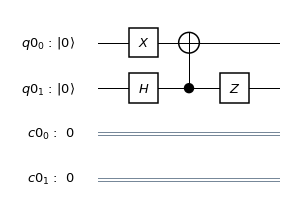

In [3]:
# singlet state
a = QuantumRegister(2)
b = ClassicalRegister(2)
s = QuantumCircuit(a,b)

s.x(a[0])
s.h(a[1])
s.cx(a[1],a[0])
s.z(a[1])
print('State Vector 1:')
print(stater(s))
s.draw(output='mpl')

State Vector 2:
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


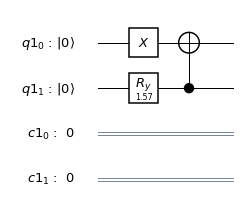

In [4]:
#triplet1 state
a = QuantumRegister(2)
b = ClassicalRegister(2)
t1 = QuantumCircuit(a,b)

t1.x(a[0])
t1.ry(pi/2,a[1])
t1.cx(a[1],a[0])
print('State Vector 2:')
print(stater(t1))
t1.draw(output='mpl')

<p>If the two vectors are in opposite phases of each other, if we turn the circuits to line up on the z axis, we should get different results when simulating a run of the circuit with shots. We can use a ry gate rotated pi/2 radians to see what happens on our singlet and triplet states.</p>

<p>We find that the singlet state will only return 10 or 01 while the triplet state will only return 00 or 11. Logically, if we think of the bloch sphere this makes sense.<br>
This information can be used by testing what is returned when one shot is performed in our singOrTrip(circ) function.</p>

In [34]:
def singOrTrip(circ):
    circuit = deepcopy(circ)
    circuit.ry(pi/2,0)
    circuit.ry(pi/2,1)
    circuit.measure(0,0)
    circuit.measure(1,1)
    qc = circuit
    shots = 1
    job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots = shots)
    counts = job.result().get_counts(qc)
    if '00' in counts or '11' in counts:
        print(counts)
        print('Triplet State')
    else:
        print(counts)
        print('Singlet State')

We find that circuit t1 is indeed a triplet state and circuit s is a singlet state as we coded.

In [33]:
singOrTrip(t1)
singOrTrip(s)

{'11': 1}
Triplet State
{'01': 1}
Singlet State
